# [Normal distribution](https://en.wikipedia.org/wiki/Normal_distribution)

## Probability density function

$ f(x) = \frac{1}{ \sigma \sqrt{2 \pi}} e^- \frac{1}{2} {(\frac{(x-\mu)}{\sigma})}^{2} $

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import os 
import pandas as pd

In [13]:
# Function to plot the normal distribution
##########################################
def plot_log_norm (mu, sigma, N, title, subtitle, xlabel, ylabel): # N is number of 
    my_normal_dist = np.random.normal(mu, sigma, N)
    count, bins, *rest = plt.hist(my_normal_dist, 30, density=True, alpha=0.8, edgecolor='black')
    # print(count); print(bins); print(*rest)
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
             np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
             linewidth=2, color='r')
     
    # mean
    plt.vlines(x = mu, ymin = 0, ymax = 0.2,
           colors = 'white',
           label = 'mean')
    plt.xlim([1,7]); plt.ylim([0,1.5])
    plt.suptitle(title); plt.title(subtitle)
    plt.xlabel(xlabel); plt.ylabel(ylabel)
    plt.show()

## Gene/Protein length distribution in different species

### Retrieve the statistical description

##### Data file

In [15]:
# system
system = list(os.uname())[0]
if system == 'Linux':
    stat_f = "/media/emuro/Wes/"
elif system == 'Darwin':
    stat_f = "/Volumes/Wes/"

# statistics on length distribution for different species     
stat_f += "results/geneLength/outputInputFiles/analysis/some_statistics/stat_description/taxid_merged/"
stat_f += "stat_description.taxid_merged.ensembl_and_ref_proteome.tsv"
print(stat_f)

# retrieve data
stat = pd.read_csv(stat_f, sep="\t")
stat.rename(columns = {"merged_division_superregnum" : 'Clades'}, inplace = True)
stat = stat[["Clades", "tax_id", "genes_species", "genes_count", "genes_mean", "genes_std"] + ["prots_count", "prots_mean", "prots_std"] + ["genes_log10_mean", "genes_log10_std"] + ["prots_log10_mean", "prots_log10_std"]]

# visualize data
pd.set_option('display.max_columns', None)
if 1:
    display(stat)

/media/emuro/Wes/results/geneLength/outputInputFiles/analysis/some_statistics/stat_description/taxid_merged/stat_description.taxid_merged.ensembl_and_ref_proteome.tsv


,Clades,tax_id,genes_species,genes_count,genes_mean,genes_std,prots_count,prots_mean,prots_std,genes_log10_mean,genes_log10_std,prots_log10_mean,prots_log10_std
0,bacteria,48,archangium_gephyra_gca_001027285,10119.0,1103.871035,1127.066255,10110.0,367.499703,375.772244,2.919254,0.333869,2.441094,0.334836
1,bacteria,52,chondromyces_crocatus_gca_001189295,8339.0,1211.514450,1051.408605,8327.0,403.466555,350.579560,2.978963,0.300250,2.501095,0.300984
2,bacteria,54,nannocystis_exedens_gca_900112715,9154.0,1078.663863,816.790904,9143.0,358.985125,272.297123,2.932587,0.301745,2.454377,0.302500
3,bacteria,69,lysobacter_enzymogenes_gca_001442515,5529.0,955.797070,1098.530524,5514.0,318.117519,366.538413,2.833547,0.359937,2.354934,0.361237
4,bacteria,94,stella_humosa_gca_003751345,5422.0,998.770749,605.573896,5422.0,332.257470,201.856974,2.926974,0.259912,2.448603,0.260765
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6516,bacteria,2605946,rhodobacteraceae_bacterium_sh_1_gca_003008555,4010.0,958.938653,607.761920,3994.0,318.607411,202.752114,2.904244,0.265631,2.425112,0.266697
6517,bacteria,2607479,isoptericola_sp_pw21_gca_003244315,3108.0,998.542149,699.274216,3108.0,332.182111,233.095550,2.915945,0.271711,2.437532,0.272560
6518,bacteria,2661937,rhodospirillaceae_bacterium_gca_003344765,3871.0,961.226040,749.043815,3868.0,319.827559,249.723238,2.900577,0.272136,2.422353,0.272657
6519,bacteria,2668039,glaciihabitans_sp_rp_3_7_gca_004310685,2984.0,989.170912,807.918791,2984.0,329.057641,269.306355,2.906253,0.272903,2.427816,0.273743


##### Data for species

In [16]:
# species' stats for length distribution
def get_df_for_taxid(df, taxid):
     return df.loc[df["tax_id"]==taxid]

##### Simulate a log10-norm distribution using the observed mu and sigma in the species

In [17]:
def get_simulated_log10_norm_distr(df_all, taxid):
    # get the df for the species
    df = get_df_for_taxid(df_all, taxid)
    # prepare the data
    index_l = df.index[df['tax_id']==taxid].tolist()       # get index 
    genes_species = df.loc[index_l[0]].at["genes_species"] # retrieve str...too complicated
    g_N, g_mu, g_sigma = (int(df["genes_count"]), float(df["genes_mean"]), float(df["genes_std"]))  
    log10_mu, log10_sigma = (float(df["genes_log10_mean"]), float(df["genes_log10_std"])) # NOT the log10 of mu!
    
    print("Gene length distribution of", genes_species)
    print(f"N:{int(g_N)}, mean:{g_mu:.2f}, sigma:{g_sigma:.2f}")
    print(f"mean(log10(len)):{log10_mu:.3f}, sigma(log10(len)):{log10_sigma:.3f}")
    return genes_species, g_N, log10_mu, log10_sigma, np.random.normal(log10_mu, log10_sigma, g_N)

In [18]:
def does_it_fits_normal(data_observed): 
    # Kurtosis and Skewness
    # =====================
    print('Kurtosis:', stats.kurtosis(data_observed))
    print('Skewness:', stats.skew(data_observed))
    # D'Agostino's K-squared test
    # ===========================
    k2, p_value = stats.normaltest(data_observed)
    print(f"D'Agostino's K-squared test(Estadístico={k2}, p-value={p_value})")

##### Deja de ser una log-normal (teóricamente)
- Kurtosis o Skewness: $\leq -1$ o $\geq 1$ 
- D'Agostino's K-squared test: p-value $ \leq 0.05 $, porque rechaza la hipótesis nula 

In [19]:
# The next function performs the whole analysis
def species_stat_simulateLogNorm_plot_and_fit(df, tax_id):
    # Retrieve the statistical description
    species_name, g_N, log10_mu, log10_sigma, species_log10norm = get_simulated_log10_norm_distr(df, tax_id)
    # plot the distribution of the log10 of the lengths (not the log of the mean)
    title = species_name.capitalize(); subtitle = "Simulation"; xlabel = "Gene length"; ylabel = "PDF"
    plot_log_norm(log10_mu, log10_sigma, g_N, title, subtitle, xlabel, ylabel)
    #
    does_it_fits_normal(species_log10norm) 

## Plot a simulated (artificial) log-norm gene length distribution

### Homo sapiens
```{note}
tax_id = 9606
```

#### Retrieve statistical description

In [20]:
homo_sapiens_df = get_df_for_taxid(stat, 9606)
homo_sapiens_df

,Clades,tax_id,genes_species,genes_count,genes_mean,genes_std,prots_count,prots_mean,prots_std,genes_log10_mean,genes_log10_std,prots_log10_mean,prots_log10_std
213,vertebrates,9606,homo_sapiens,19976.0,68287.089808,132423.575448,20614.0,552.845105,595.745883,4.40396,0.644353,2.601146,0.353891


In [21]:
species_name, g_N, log10_mu, log10_sigma, homo_sapiens_log10norm = get_simulated_log10_norm_distr(stat, 9606)

Gene length distribution of homo_sapiens
N:19976, mean:68287.09, sigma:132423.58
mean(log10(len)):4.404, sigma(log10(len)):0.644


#### Plot a simulated log-norm gene length distribution

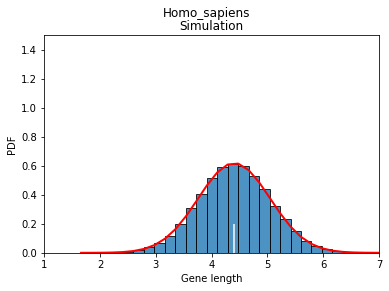

In [22]:
# plot the distribution of the log10 of the lengths (not the log of the mean)
title = species_name.capitalize(); subtitle = "Simulation";  xlabel = "Gene length"; ylabel = "PDF"
plot_log_norm(log10_mu, log10_sigma, g_N, title, subtitle, xlabel, ylabel)

#### Does the distribution fits the normal distribution?

In [23]:
does_it_fits_normal(homo_sapiens_log10norm) 

Kurtosis: -0.009618920461068381
Skewness: 0.01415280476664369
D'Agostino's K-squared test(Estadístico=0.7313258963009205, p-value=0.6937365870083192)


### Danio rerio
```note
tax_id = 7955
```

#### Retrieve the statistical description, simulate log-norm, plot and fit

Gene length distribution of danio_rerio
N:25432, mean:31084.05, sigma:51637.15
mean(log10(len)):4.137, sigma(log10(len)):0.575


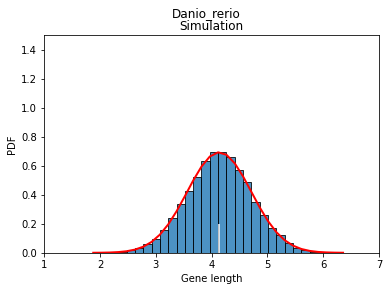

Kurtosis: 0.03067554253986371
Skewness: -0.024146309372479604
D'Agostino's K-squared test(Estadístico=3.4860393481495784, p-value=0.17499118564415797)


In [24]:
species_stat_simulateLogNorm_plot_and_fit(stat, 7955)

### Drosophila melanogaster
```{note}
tax_id = 7227
```

Gene length distribution of drosophila_melanogaster
N:13947, mean:6953.27, sigma:24274.86
mean(log10(len)):3.430, sigma(log10(len)):0.512


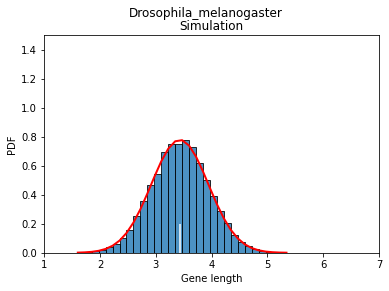

Kurtosis: -0.03139050599653315
Skewness: -0.02572216494413131
D'Agostino's K-squared test(Estadístico=2.084190183602571, p-value=0.35271493713972196)


In [25]:
species_stat_simulateLogNorm_plot_and_fit(stat, 7227)

### Arabidopsis thaliana
```note
tax_id = 3702
```

Gene length distribution of arabidopsis_thaliana
N:27628, mean:2371.75, sigma:1635.87
mean(log10(len)):3.278, sigma(log10(len)):0.313


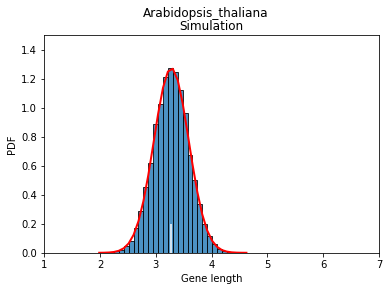

Kurtosis: 0.05978355877972197
Skewness: -0.014487963585801733
D'Agostino's K-squared test(Estadístico=4.937730014922745, p-value=0.08468091668747889)


In [26]:
species_stat_simulateLogNorm_plot_and_fit(stat, 3702)

---
### No están en:

In [27]:
print(stat_f)

/media/emuro/Wes/results/geneLength/outputInputFiles/analysis/some_statistics/stat_description/taxid_merged/stat_description.taxid_merged.ensembl_and_ref_proteome.tsv


#### Saccharomyces cervisae
```{note}
tax_id = 4932
```

#### E coli
```{note}
tax_id = 83333
```